In [1]:
import sys
sys.path.insert(1, '../')

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from tensorflow import keras

from nlp_model_v1 import Model, experiment

In [3]:
df = pd.read_csv('../ensambles baseline/data/tex_physics.csv')

In [4]:
def class_decider(row):
    if row['score'] < 2.:
        return 0
    elif row['score'] > 2.:
        return 1
    else:
        if row['n_answers'] < 1.:
            return 0
        else:
            return 1

In [5]:
df.loc[:, 'y'] = df.apply(class_decider, axis=1)

In [6]:
df['y'].value_counts()

0    186511
1    184785
Name: y, dtype: int64

In [7]:
data = df[['body', 'title', 'n_lists', 'n_links', 'n_tags',
       'num_question_marks', 'wh_word_count', 'sentence_count', 'word_count',
       'example_count', 'n_linebreaks', 'title_word_count',
       'title_question_marks', 'y']]

In [8]:
train_data, val_data = train_test_split(data, test_size=0.3, stratify=data['y'], random_state=42)

In [9]:
train_data

,body,title,n_lists,n_links,n_tags,num_question_marks,wh_word_count,sentence_count,word_count,example_count,n_linebreaks,title_word_count,title_question_marks,y
292249,I want to print out handout for my beamer pres...,How do I install pgfpages package?,0,0,3,2,0,3,27,0,1,6,1,0
178165,I installed TeX Live 2011 from source in my Ub...,AUCTeX can't find PDFLaTeX,0,0,2,1,3,6,90,0,7,5,0,1
223579,"According to the answer given here, the microt...",Loading microtype before or after the font,0,4,1,1,3,5,174,0,20,7,0,1
266094,I want to draw a propeller in 3D for my fluid ...,Render stl files in asymptote,0,5,2,0,1,5,80,0,4,5,0,1
44330,When I was a boy (I live in the UK) most light...,How bright is a 150 W incandescent light bulb?,0,0,1,1,2,6,86,0,3,8,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
344381,I have searched everywhere for an answer to th...,"\usepackage{tikz} causing ""extra }"" and ""missi...",0,0,3,0,4,30,453,0,128,7,0,0
341925,I have made the following theorem environment ...,Indenting all lines in a theorem environment,0,2,1,2,1,5,108,0,34,7,0,0
71506,I'm a beginner with the study in data analysis...,Why is the standard deviation the error on the...,1,0,4,1,7,7,290,0,19,11,1,0
130699,"As the title says, when does magnetic force sa...",When does magnetic force act as a centripetal ...,0,0,2,4,3,4,49,0,2,14,1,0


In [10]:
specs = {
    'data_path': '../ensambles baseline/data/tex_physics.csv',
    'train_data': train_data,
    'val_data': val_data,
    'max_tokens': 6000,
    'embedding_dimension': 64,
    'embedding_dropout': 0.5,
    'body_layer_type': 'gru',
    'body_sequence_length': 70,
    'body_layers': [64],
    'body_activation': 'tanh',
    #'body_reg': [1e-6],
    'body_dropout': [0.5],
    'title_layer_type': 'gru',
    'title_sequence_length': 20,
    'title_layers': [16],
    'title_activation': 'tanh',
    #'title_reg': [1e-6],
    'title_dropout': [0.5],
    'dense_layers': [64],
    'dense_activation': 'relu',
    #'dense_reg': [1e-6],
    'dense_dropout': [0.5],
    'normalize_features': False,
    'optimizer_type': 'adam',
    'batch_size': 4096,
    'epochs': 2
}

In [11]:
model, results = experiment('./registry.json', specs)

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
body_tokenized (InputLayer)     [(None, 70)]         0                                            
__________________________________________________________________________________________________
title_tokenized (InputLayer)    [(None, 20)]         0                                            
__________________________________________________________________________________________________
embedding (Embedding)           multiple             384000      title_tokenized[0][0]            
                                                                 body_tokenized[0][0]             
__________________________________________________________________________________________________
dropout (Dropout)               multiple             0           embedding[0][0]       

In [12]:
results

{'data_path': '../ensambles baseline/data/tex_physics.csv',
 'max_tokens': 6000,
 'embedding_dimension': 64,
 'embedding_dropout': 0.5,
 'body_layer_type': 'gru',
 'body_sequence_length': 70,
 'body_layers': [64],
 'body_activation': 'tanh',
 'body_dropout': [0.5],
 'title_layer_type': 'gru',
 'title_sequence_length': 20,
 'title_layers': [16],
 'title_activation': 'tanh',
 'title_dropout': [0.5],
 'dense_layers': [64],
 'dense_activation': 'relu',
 'dense_dropout': [0.5],
 'normalize_features': False,
 'optimizer_type': 'adam',
 'batch_size': 4096,
 'epochs': 2,
 'train_accuracy': 0.530859112739563,
 'val_accuracy': 0.5040623545646667}

In [13]:
model.predict(val_data.iloc[:3])

array([[0.46418682],
       [0.5017051 ],
       [0.44371983]], dtype=float32)

In [14]:
val_data.iloc[:3, -1]

363092    0
234864    0
227402    1
Name: y, dtype: int64

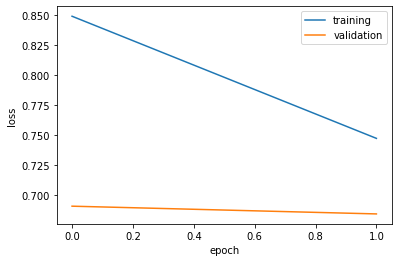

In [15]:
plt.plot(model.history['loss'])
plt.plot(model.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['training', 'validation'])

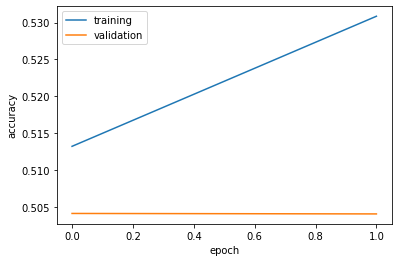

In [16]:
plt.plot(model.history['accuracy'])
plt.plot(model.history['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['training', 'validation'])

In [17]:
tokenizer = model.tokenizer
normalizer = model.normalizer

In [25]:
specs = {
    'data_path': '../ensambles baseline/data/tex_physics.csv',
    'train_data': train_data,
    'val_data': val_data,
    'max_tokens': 10000,
    'embedding_dimension': 64,
    #'embedding_dropout': 0.05,
    'body_layer_type': 'gru',
    'body_sequence_length': 70,
    'body_layers': [64],
    'body_activation': 'tanh',
    'body_reg': [1e-2],
    #'body_dropout': [0.5],
    'title_layer_type': 'gru',
    'title_sequence_length': 20,
    'title_layers': [16],
    'title_activation': 'tanh',
    'title_reg': [1e-2],
    #'title_dropout': [0.5],
    'dense_layers': [64],
    'dense_activation': 'relu',
    'dense_reg': [1e-2],
    #'dense_dropout': [0.5],
    'normalize_features': False,
    'optimizer_type': 'adam',
    'batch_size': 4096,
    'epochs': 10
}

In [26]:
model, results = experiment('./registry.json', specs, tokenizer, normalizer)

Model: "functional_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
body_tokenized (InputLayer)     [(None, 70)]         0                                            
__________________________________________________________________________________________________
title_tokenized (InputLayer)    [(None, 20)]         0                                            
__________________________________________________________________________________________________
embedding_2 (Embedding)         multiple             640000      title_tokenized[0][0]            
                                                                 body_tokenized[0][0]             
__________________________________________________________________________________________________
sequential_6 (Sequential)       (None, 128)          49920       embedding_2[1][0]     

In [27]:
results

{'data_path': '../ensambles baseline/data/tex_physics.csv',
 'max_tokens': 10000,
 'embedding_dimension': 64,
 'body_layer_type': 'gru',
 'body_sequence_length': 70,
 'body_layers': [64],
 'body_activation': 'tanh',
 'body_reg': [0.01],
 'title_layer_type': 'gru',
 'title_sequence_length': 20,
 'title_layers': [16],
 'title_activation': 'tanh',
 'title_reg': [0.01],
 'dense_layers': [64],
 'dense_activation': 'relu',
 'dense_reg': [0.01],
 'normalize_features': False,
 'optimizer_type': 'adam',
 'batch_size': 4096,
 'epochs': 10,
 'train_accuracy': 0.7161715626716614,
 'val_accuracy': 0.5405111908912659}

In [28]:
model.predict(val_data.iloc[:3])

array([[0.10853703],
       [0.51997995],
       [0.63692415]], dtype=float32)

In [22]:
val_data.iloc[:3, -1]

363092    0
234864    0
227402    1
Name: y, dtype: int64

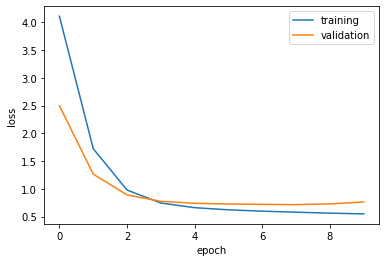

In [29]:
plt.plot(model.history['loss'])
plt.plot(model.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['training', 'validation'])

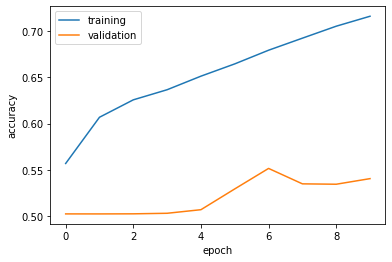

In [30]:
plt.plot(model.history['accuracy'])
plt.plot(model.history['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['training', 'validation'])